In [56]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [57]:
df = pd.concat([pd.read_csv("./results/" + f, skipinitialspace=True) for f in os.listdir("results/")])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4220 entries, 0 to 709
Data columns (total 4 columns):
language     4220 non-null object
benchmark    4220 non-null object
run_id       4220 non-null int64
time         4220 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 164.8+ KB


In [59]:
prec = df[(df["benchmark"] == "100ms") & (df["run_id"] > 0)].set_index("language")

In [60]:
prec.groupby("language")["time"].std()

language
enso      0.098944
python    0.102466
Name: time, dtype: float64

In [61]:
(prec["time"] - 100).abs().groupby("language").max()

language
enso      0.868490
python    0.417619
Name: time, dtype: float64

In [62]:
cutoff = 0

In [63]:
benchmarks = df[(df["benchmark"] != "100ms") & (df["run_id"] >= cutoff)]

In [68]:
def plot_profiles(language):
    df = benchmarks[benchmarks["language"] == language]
    plt.figure(figsize=(10,8))
    sns.lineplot(data=df, x="run_id", y="time", hue="benchmark", estimator=None)
    plt.title(language)
    plt.show()
    for b in benchmarks["benchmark"].unique():
        df2 = df[df["benchmark"] == b]
        plt.figure(figsize=(10,8))
        sns.lineplot(data=df, x="run_id", y="time", estimator=None)
        plt.title(b)
        plt.show()

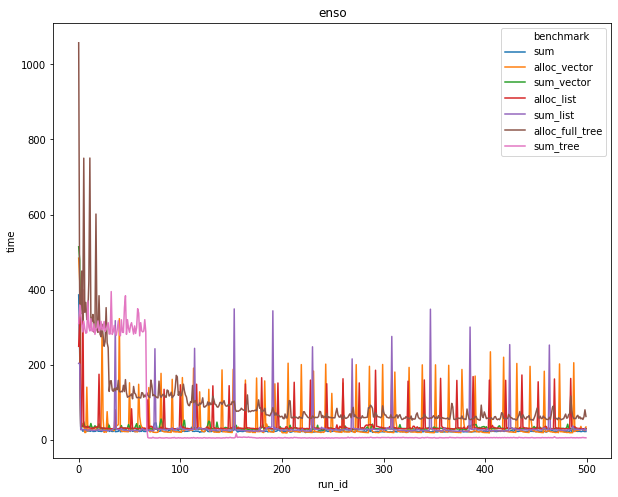

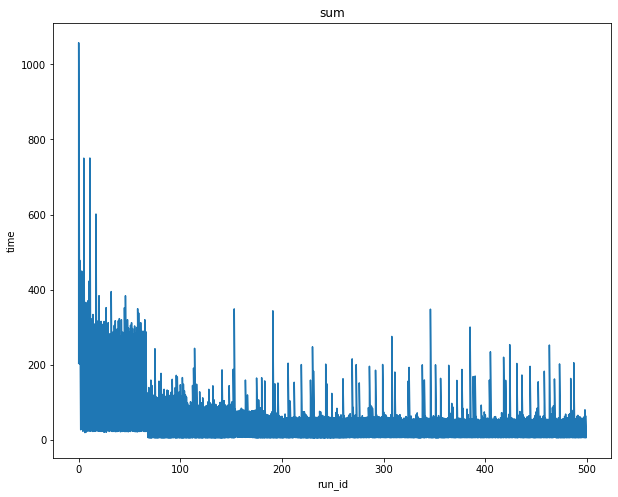

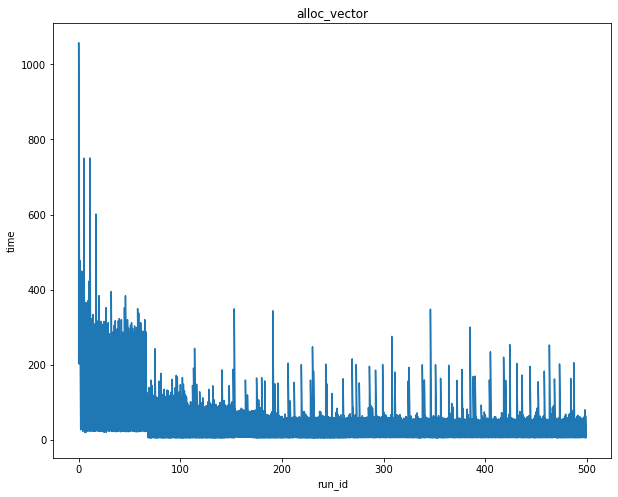

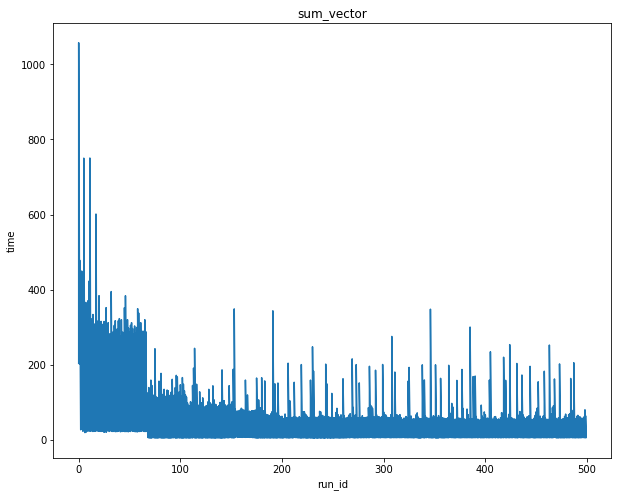

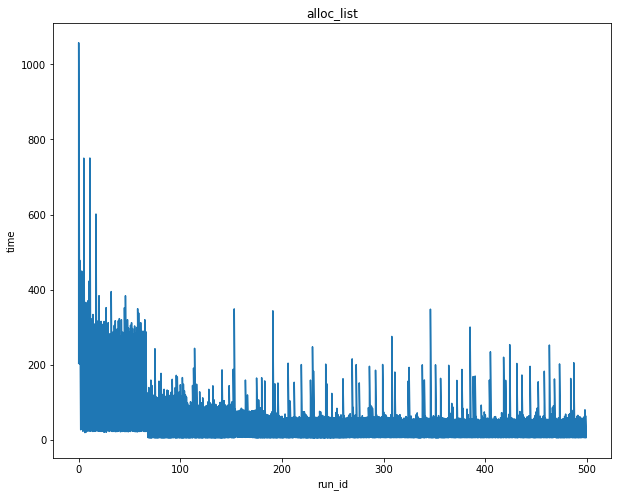

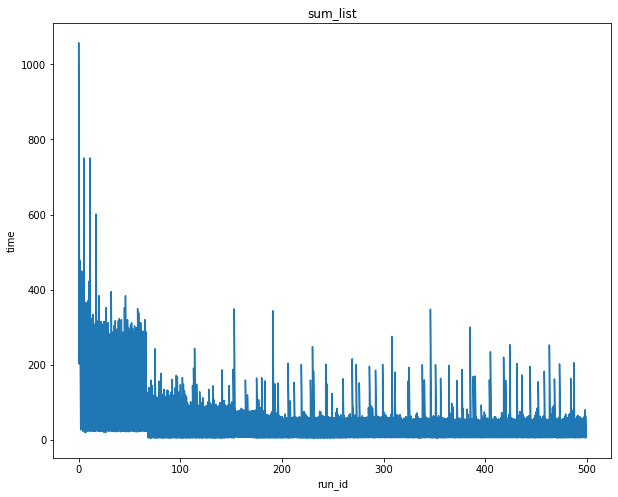

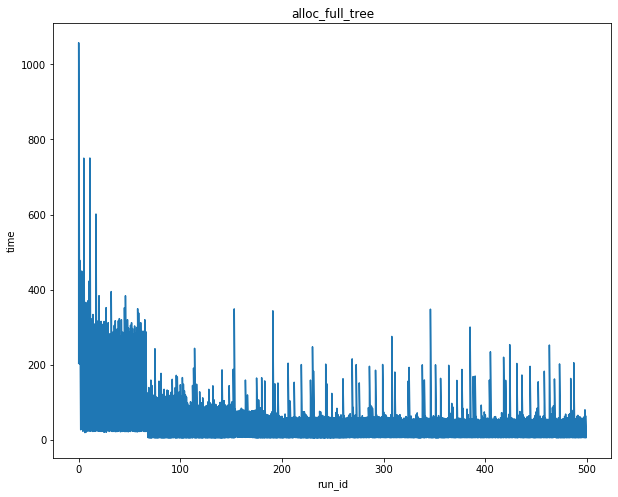

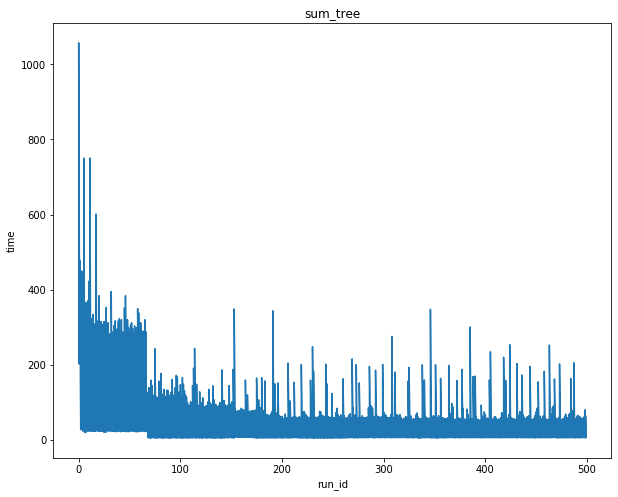

In [69]:
plot_profiles("enso")

In [46]:
def plot(benchmark_name):
    df = benchmarks[benchmarks["benchmark"] == benchmark_name]
    plt.figure(figsize=(10,8))
    sns.lineplot(data=df, x="run_id", y="time", hue="language", estimator=None)

In [48]:
names = benchmarks["benchmark"].unique()
names

array(['sum', 'alloc_vector', 'sum_vector', 'alloc_list', 'sum_list',
       'alloc_tree', 'sum_tree', 'alloc_full_tree'], dtype=object)

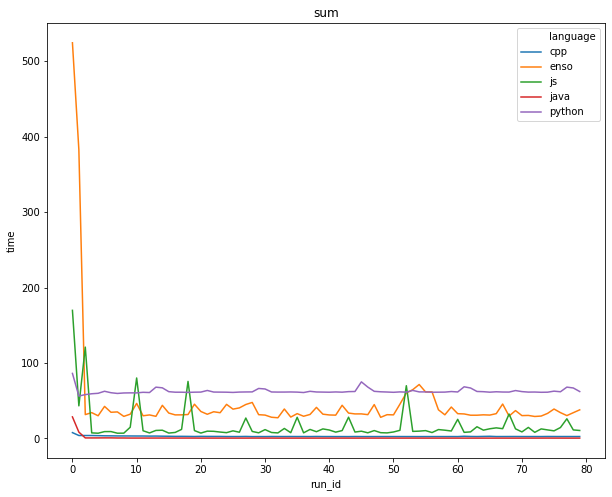

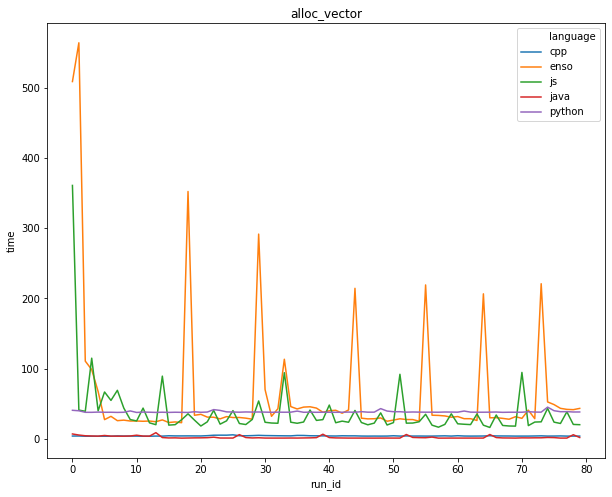

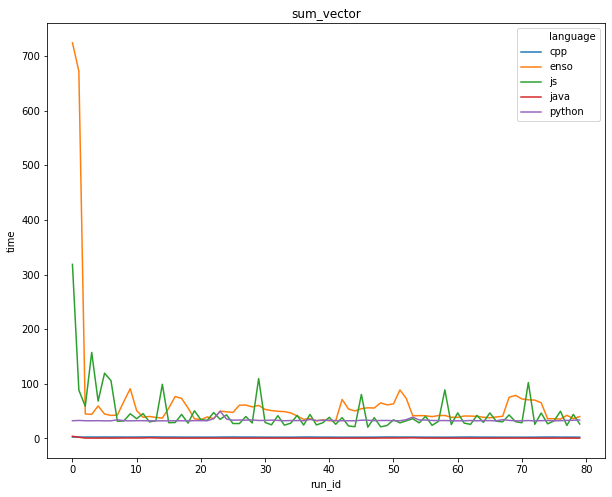

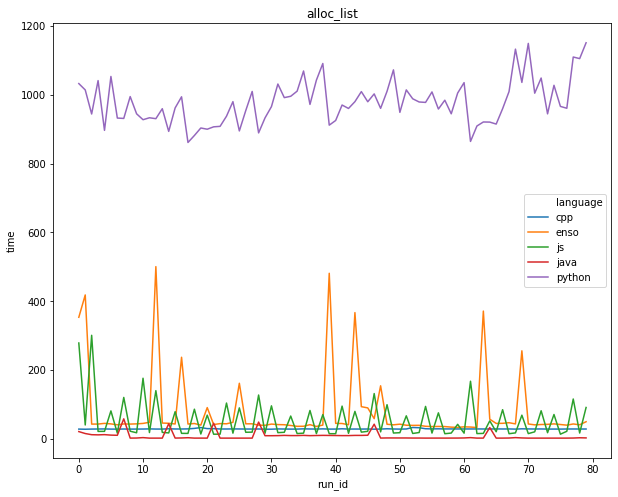

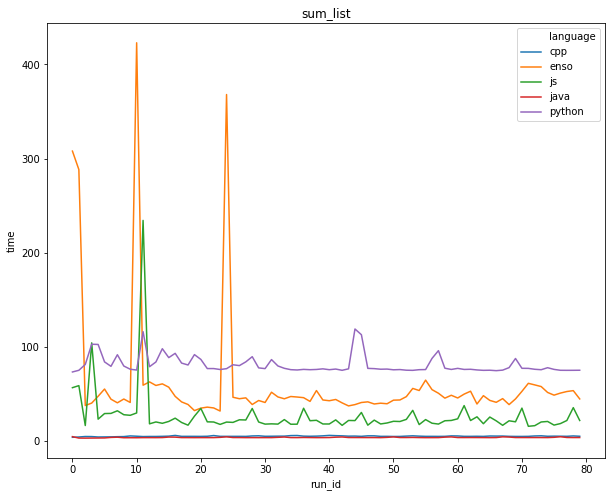

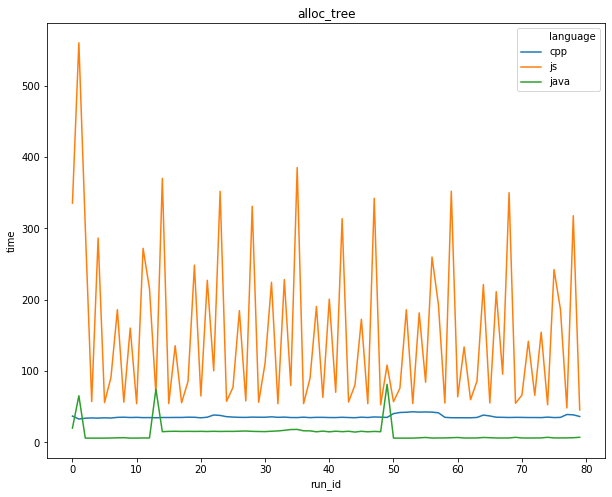

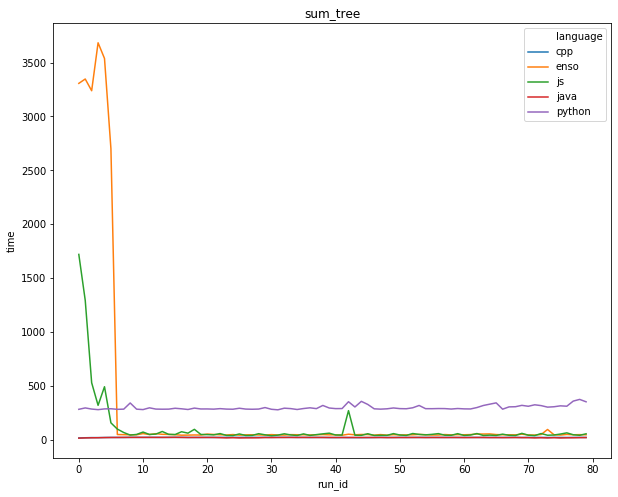

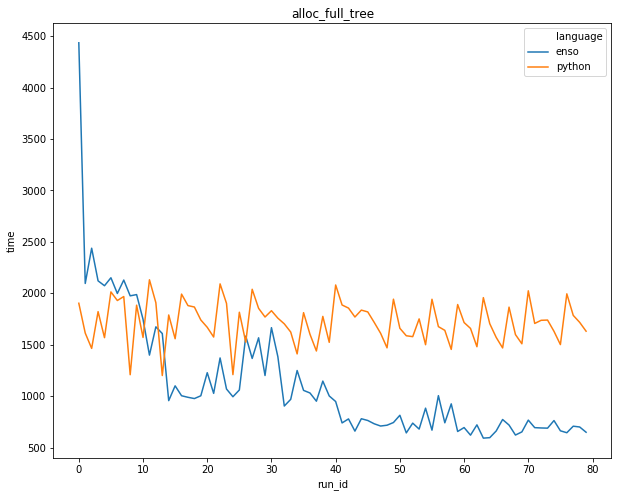

In [52]:
for name in names:
    plot(name)
    plt.title(name)
    plt.show()

In [53]:
cutoff2 = 15
benchmarks2 = df[(df["benchmark"] != "100ms") & (df["run_id"] >= cutoff2)]

In [55]:
benchmarks2.groupby(["benchmark", "language"])["time"].mean()

benchmark        language
alloc_full_tree  enso         889.829608
                 python      1717.188968
alloc_list       cpp           29.420680
                 enso          70.998163
                 java           7.282959
                 js            45.872982
                 python       982.245053
alloc_tree       cpp           36.217140
                 java          12.356142
                 js           141.100204
alloc_vector     cpp            4.241393
                 enso          55.447265
                 java           1.692824
                 js            29.180352
                 python        38.454396
sum              cpp            2.486661
                 enso          36.712717
                 java           0.361496
                 js            13.515452
                 python        62.435487
sum_list         cpp            4.935356
                 enso          50.568570
                 java           3.533689
                 js            

In [71]:
pythons = benchmarks[benchmarks["language"] == "python"]
pythons.shape

(700, 4)

In [78]:
ensos = benchmarks[(benchmarks["language"] == "enso") & (benchmarks["run_id"] >= 400)]
ensos["run_id"] = ensos["run_id"] - 400
ensos.shape

/home/radeusgd/Anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(700, 4)

In [79]:
cmp = pd.concat([pythons, ensos])

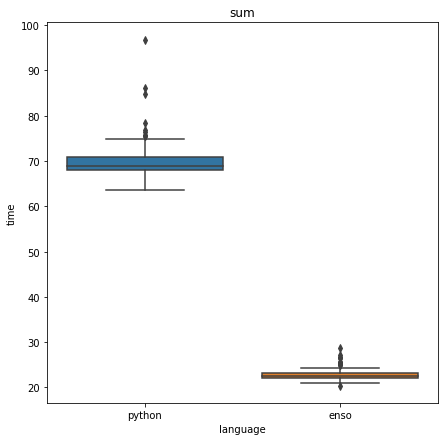

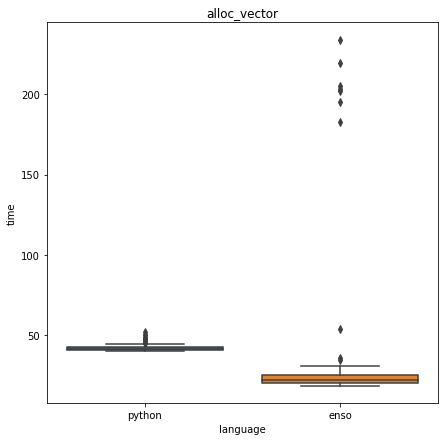

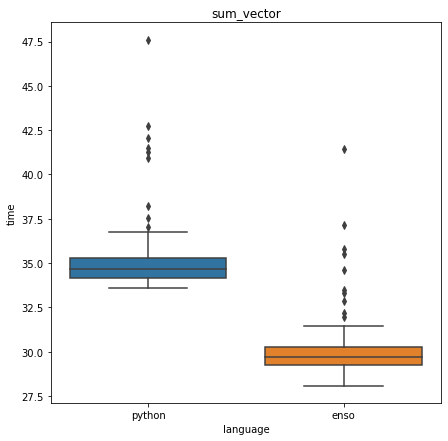

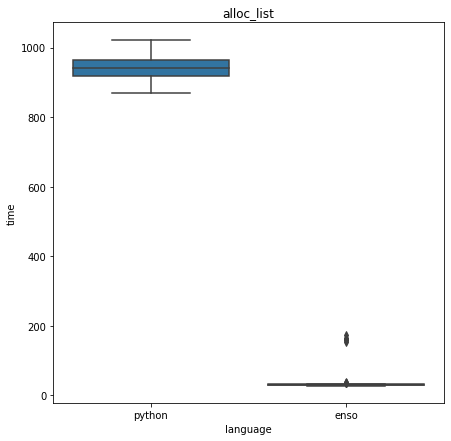

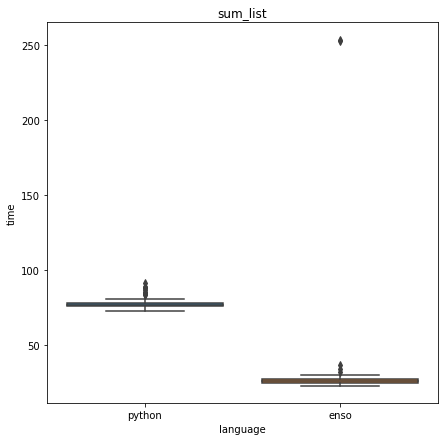

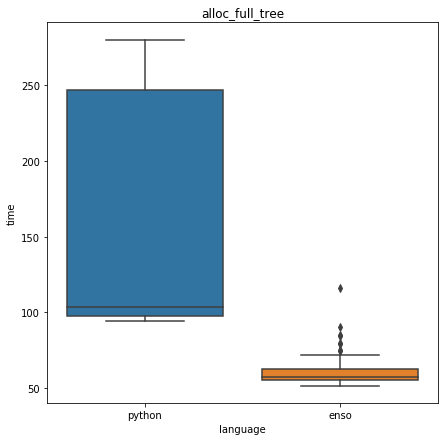

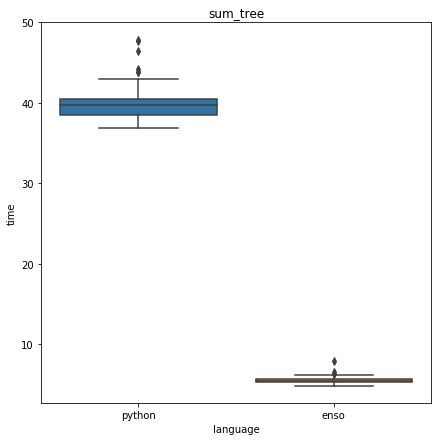

In [87]:
for b in cmp["benchmark"].unique():
    bs = cmp[cmp["benchmark"] == b]
    plt.figure(figsize=(7,7))
    sns.boxplot(data=bs, y="time", x="language")
    plt.title(b)
    plt.show()

In [98]:
means = cmp.groupby(["benchmark", "language"])["time"].mean()

names = []
boosts = []
for b in cmp["benchmark"].unique():
    e = means.loc[b, "enso"]
    p = means.loc[b, "python"]
    boost = p / e
    names.append(b)
    boosts.append(boost)
boosts = pd.DataFrame({"benchmark": names, "boost": boosts})
boosts

,benchmark,boost
0,sum,3.063260
1,alloc_vector,1.181811
2,sum_vector,1.166849
3,alloc_list,24.553084
4,sum_list,2.498941
5,alloc_full_tree,2.586213
6,sum_tree,7.267585
